<a href="https://colab.research.google.com/github/juccaicedoac03/Data_Science_Course/blob/main/1_Ra%C3%ADces_de_funciones/Bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definiciones de error

* Error verdadero :

$$ E_{t} = \text{valor verdadero} - \text{valor aproximado} $$

* Error relativo porcentual verdadero:

$$ \epsilon_{t} = \frac{\text{valor verdadero} - \text{valor aproximado}}{\text{valor verdadero}}\cdot 100\% $$

* Error relativo porcentual aproximado: 

$$ \epsilon_{a} = \frac{\text{aproximación presente} - \text{aproximación anterior}}{\text{aproximación presente}}\cdot 100\% $$

* Criterio de parada:

$$ \text{Terminar cuando: } \epsilon_{a}<\epsilon_{s} $$

$$ \epsilon_{s}: \text{ error relativo porcentual deseado} $$

# Método de Bisección

<img src="https://github.com/juccaicedoac03/Numeric_methods_and_Optimization_Course/blob/main/1_Ra%C3%ADces_de_funciones/Figs/root1.png?raw=true:, width=100" alt="find roots" width=200>


Localizar el intervalo donde la función cambia de signo: $f(x_{l})f(x_{u})<0$

\\
**Clave:** 

Dividir el intervalo (a la mitad) en varios subintervalos. Se investiga cada uno de estos subintervalos para encontrar el cambio de signo. El proceso se repite y la aproximación a la raíz mejora cada vez más en la medida que los subintervalos se dividen en intervalos cada vez más pequeños.

\\
Si la función cambia de signo sobre un intervalo, se evalúa el valor de la función en el punto medio. La posición de la raíz se determina situándola en el punto medio del subintervalo, dentro del cual ocurre un cambio de signo. El proceso se repite hasta obtener una mejor aproximación.

\\

**Pasos:**

* *Paso 1:* Se elijen valores iniciales inferior $(x_l)$, y superior $(x_u)$, que encierren la raíz, de forma tal que la función cambie de signo en el intervalo. Esto se verifica comprobando que $f(x_l) f(x_u) < 0$.

* *Paso 2:* Una aproximación de la raíz $x_r$ se determina mediante:

$$ x_{r} = \frac{x_{l} + x_{u}}{2} $$

* *Paso 3:* Realice las siguientes evaluaciones para determinar en qué subintervalo está la raíz:

    * Si $f(x_l) f(x_u) < 0$ entonces la raíz se encuentra dentro del subintervalo inferior o izquierdo. Por lo tanto: $x_{u} = x_{r}$ y volver al paso 2.

    * Si $f(x_l) f(x_u) > 0$ entonces la raíz se encuentra dentro del subintervalo superior o derecho. Por lo tanto: $x_{l} = x_{r}$ y volver al paso 2.

    * Si $f(x_l) f(x_u) = 0$, la raíz es igual a $x_{r}$; termina el cálculo.


\\
**Criterio de parada:** 

Se requiere estimar el error de forma tal que no se necesite el conocimiento previo de la raíz.

Se usa el error relativo porcentual aproximado: 

$$ \epsilon_{a} = \bigg|\frac{x_{r}^{nuevo} - x_{r}^{anterior}}{x_{r}^{nuevo}}\bigg|\cdot 100\% $$

donde $X_{r}$ es el valor de la raíz.

*Cuando $\epsilon_{a}$ es menor que un umbral fijado $\epsilon_{s}$, termina el cálculo*

\\
**Anotaciones:** (Demostrar)

* La raíz verdadera se halla en algún lugar dentro del intervalo de $(x_u - X_l)/2 = \Delta x/2$

* $\Delta x/2 = x_{r}^{nuevo}-x_{r}^{anterior}$

* $x_{r}^{nuevo}-x_{r}^{anterior} = \frac{x_u - x_l}{2}$

* $x_{r}^{nuevo} = \frac{x_l + x_u}{2}$

* $\epsilon_{a} = \big| \frac{x_u -x_l}{x_u + x_l}\big|\cdot 100\%$


\\
**Ventajas:** 

El número de iteraciones requerido para obtener un error absoluto se calcula a priori:

* El error inicial (absoluto) es: $E_{a}^{0} = x_{u}^{0}-x_{l}^{0} = \Delta x^{0}$

* Después de la primera iteración el error será: $E_{a}^{1} = \frac{\Delta x^{0}}{2}$

* El error se reduce a la mitad en cada iteración $n$ y su forma general es: $E_{a}^{n} = \frac{\Delta x^{0}}{2^{n}}$

**Ejercicio:** Si $E_{a,d}$ es el error deseado, despejar de la anterior ecuación y encontrar n

# Algoritmo

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def fn(x): # Creamos la función 
    return ((667.38/x)*(1-np.exp(-0.146843*x)))-40

In [77]:
X = np.arange(1,21)

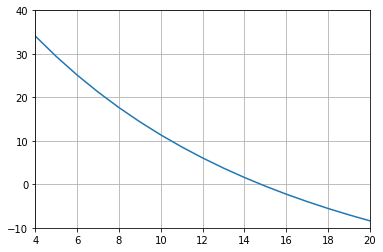

In [78]:
plt.plot(X,fn(X))
plt.xlim([4,20])
plt.ylim([-10,40])
plt.grid(True)
plt.show()

In [94]:
# parámetros iniciales

xl = 12 
xu = 16

es = 0.5
imax = 15


# algoritmo iterativo

ea = abs(xu - xl)

iter = 0

xr = xl


while (ea > es) and (iter <= imax):

    xrold = xr
    xr = (xl + xu)/2

    iter += 1
    
    if xr != 0:
        ea = abs((xr-xrold)/xr) * 100
    
    test = fn(xl) * fn(xr)

    if test <0:
        xu = xr
    elif test > 0:
        xl = xr
    else:
        ea = 0

    print('Iter: {}  x_l: {}  x_u: {}  x_r: {}  E_a: {}'.format(iter, xl, xu , xr, np.round(ea,3)))


Iter: 1  x_l: 14.0  x_u: 16  x_r: 14.0  E_a: 14.286
Iter: 2  x_l: 14.0  x_u: 15.0  x_r: 15.0  E_a: 6.667
Iter: 3  x_l: 14.5  x_u: 15.0  x_r: 14.5  E_a: 3.448
Iter: 4  x_l: 14.75  x_u: 15.0  x_r: 14.75  E_a: 1.695
Iter: 5  x_l: 14.75  x_u: 14.875  x_r: 14.875  E_a: 0.84
Iter: 6  x_l: 14.75  x_u: 14.8125  x_r: 14.8125  E_a: 0.422


**Ejercicio:** Crear una función que encuentre las raíces de una función a través del método de bisección y probarlo con 3 funciones distintas.

**NOTA:** El algoritmo de bisección es adecuado si se quiere realizar la evaluación de una sola raíz de una función que es fácil de evaluar. Sin embargo, hay muchos casos en ingeniería que no son así. Por ejemplo, suponga que se quiere desarrollar un programa computacional que localice varias raíces.

**Ejercicio:** ¿Cual es la complejidad del algoritmo? 